<a href="https://colab.research.google.com/github/Matteo-Candi/ADMLT_HWs/blob/main/Labs/Lab02_NDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparation

##Libraries

> These are the python packages we will need for this notebook

In [ ]:
import csv
import random
import itertools as it
import numpy as np

##Data

> First, we need to download our data from Google Drive using the gdown command and the file identifier.

> The file is a collection of tweets "Democrat vs. Republican Tweets" obtained from Kaggle. It is formatted as "[docno] \t [text] \n".

In [ ]:
!gdown --id 12z4xEGPcenFhQm5BA4dFJkE8EIVdAssn

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12z4xEGPcenFhQm5BA4dFJkE8EIVdAssn
To: /content/tweets.txt
100% 12.4M/12.4M [00:00<00:00, 42.4MB/s]


> The file has been downloaded. Its name is `"tweets.txt"`

## Problem Statement

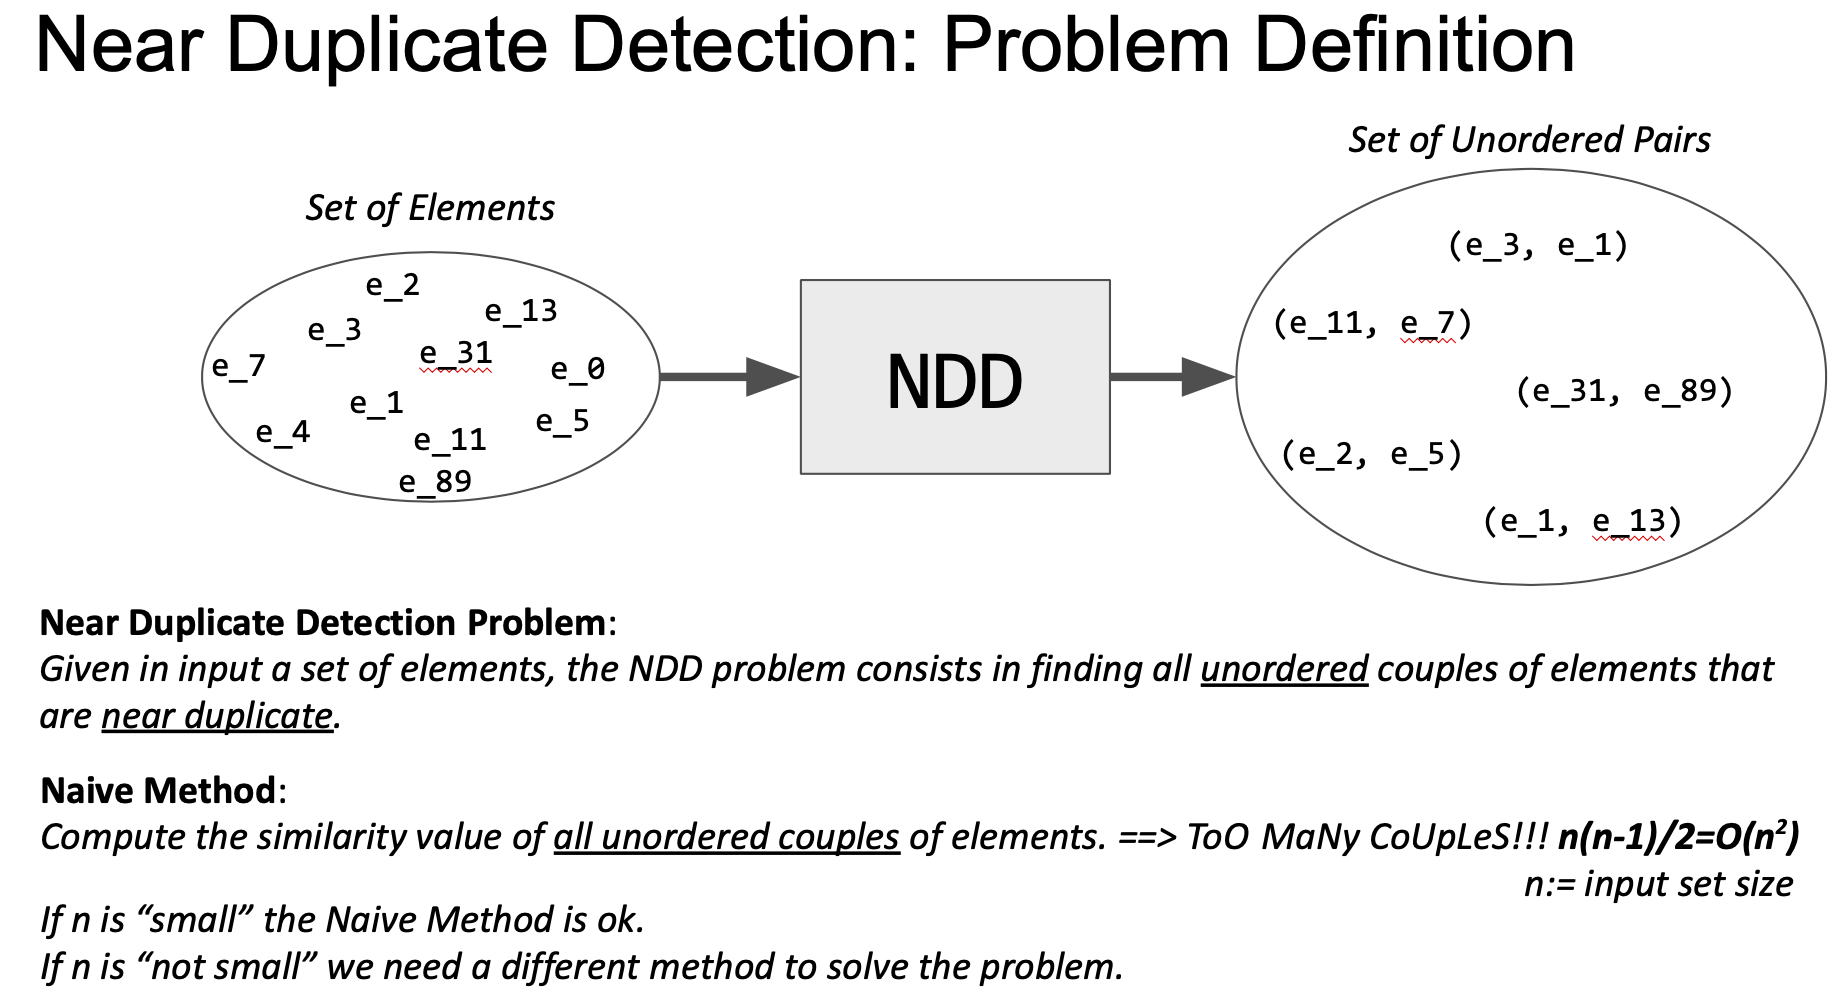

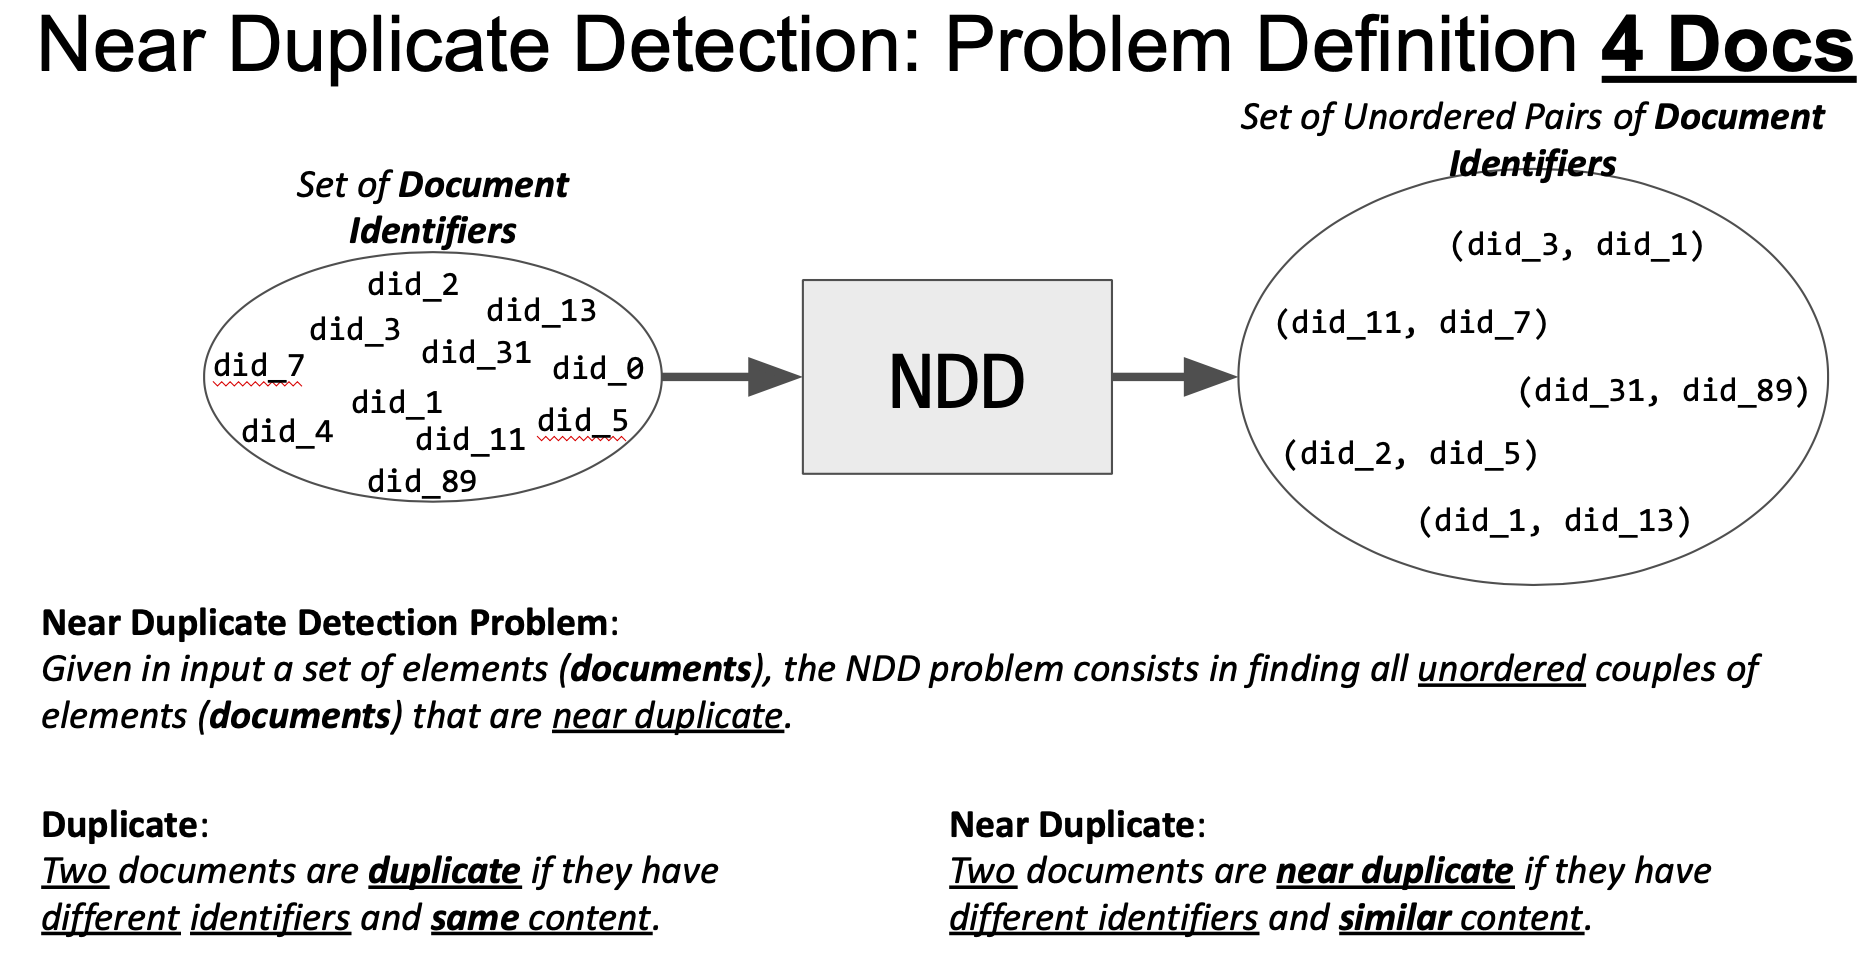

#Near-Duplicates Detection

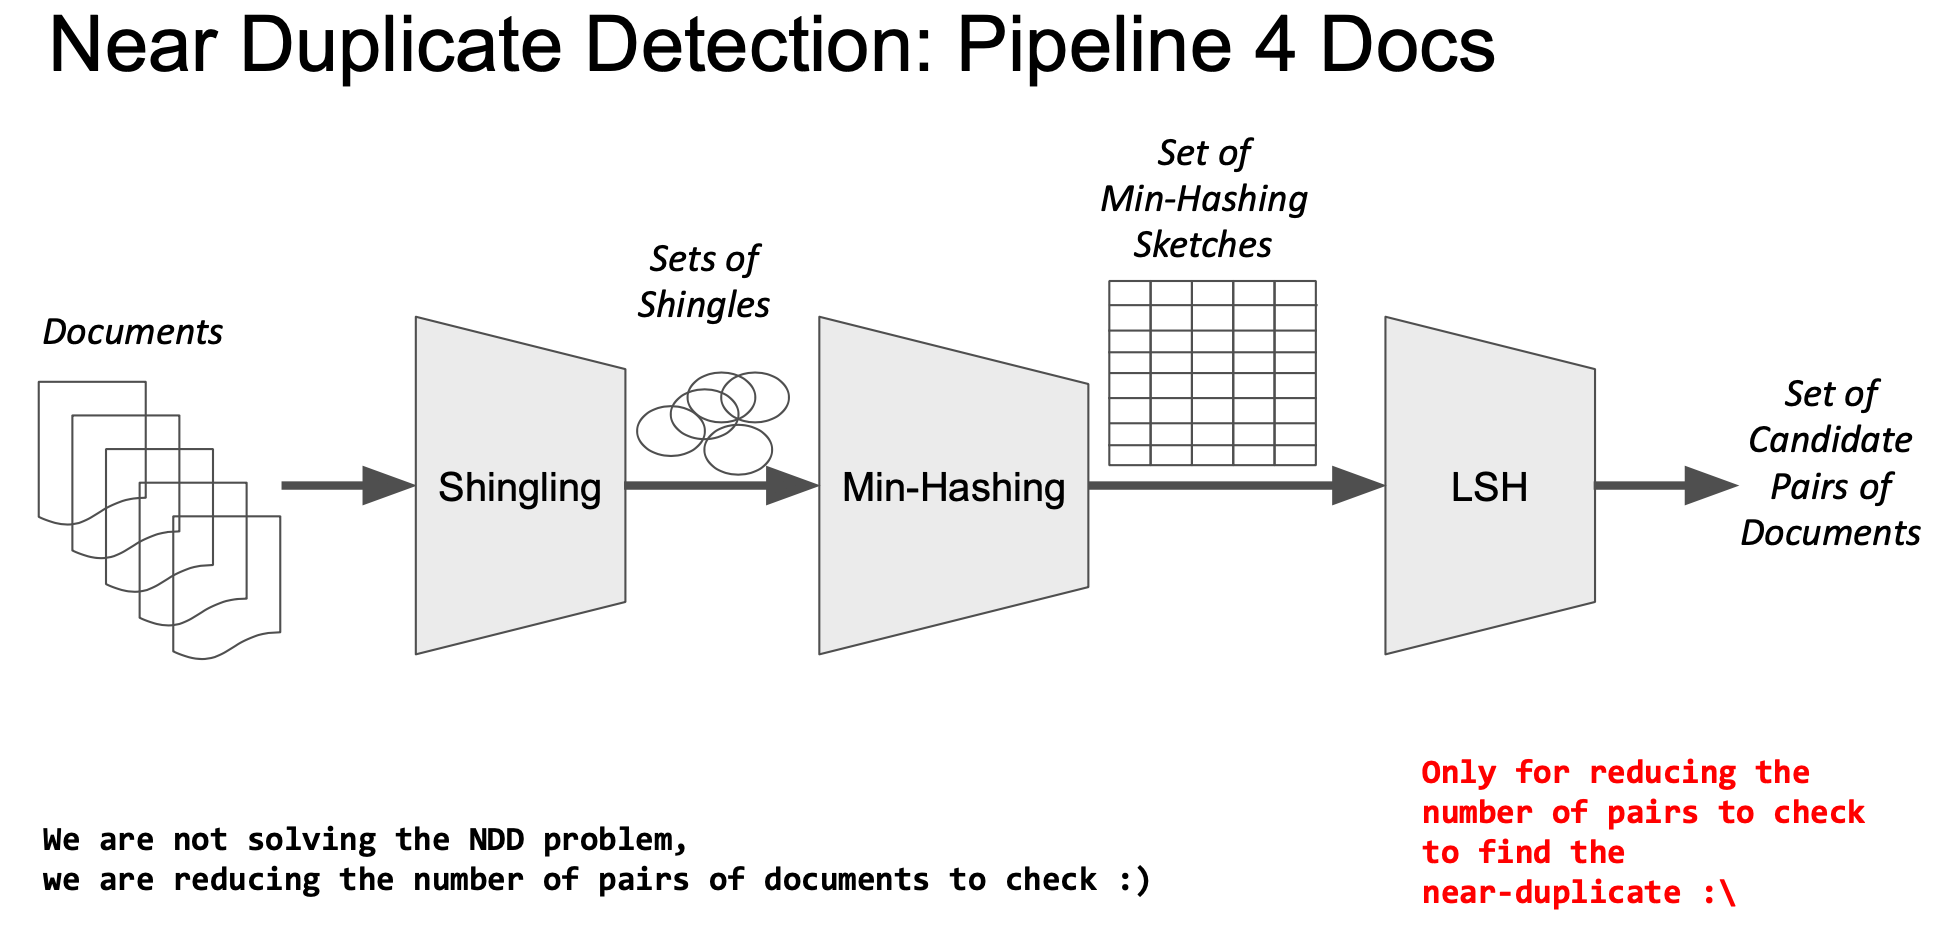

##Shingling

### Functions

#### Cleaner

> The `cleaner` function will remove from a string all the characters that are not in a predefined set of characters of interest. Multiple spaces will be removed automatically. The function will also remove spaces at the start and end of the sentence, and change all the letters to lowercase.

In [ ]:
def cleaner(text, set__characters_of_interest):
    new_text = ""
    #
    previous_copied_character = "a"
    for c_character in text:
        #
        c_character = c_character.lower()
        #
        if c_character not in set__characters_of_interest:
            c_character = " "
        #
        if c_character == " " and c_character == previous_copied_character:
            continue
        #
        new_text += c_character
        #
        previous_copied_character = c_character
        #
    #
    new_text = new_text.strip()
    #
    return new_text

In [ ]:
set__characters_of_interest = set(
    [' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
     'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])

cleaner(" Exampleè TEXT @@@@@.,-_àèéù+*?ì^. It's working? òòòòòò", set__characters_of_interest)

'example text it s working'

#### Shingler

> The `get_shingle_id` function will transform a shingle (a tuple of strings) into its shingle id. The `map__shingle__shingle_id` dictionary will handle the mapping.

In [ ]:
def get_shingle_id(shingle):
    global max_shingle_id
    global map__shingle__shingle_id
    #
    shingle_id = map__shingle__shingle_id.get(shingle, -1)
    #
    if shingle_id >= 0:
        return shingle_id
    #
    max_shingle_id += 1
    shingle_id = max_shingle_id
    map__shingle__shingle_id[shingle] = max_shingle_id
    #
    return shingle_id

> The `shingler` function takes as input a string and (optionally) a shingle width. It splits the string into words, then iterates in groups of the given length, transforming each into its own shingle_id, and finally outputs the set of shingles that constitutes the sentence.

In [ ]:
def shingler(text, width=2):
    #
    set__shingle_id = set()
    #
    tokenized_text = text.split(" ")
    #
    max_index_plus_1 = 1 if len(tokenized_text) <= width else len(tokenized_text) - width +1
    for index in range(max_index_plus_1):
        #
        c_shingle = tuple(tokenized_text[index:index + width])
        #
        shingle_id = get_shingle_id(c_shingle)
        #
        # if shingle_id in set__shingle_id:
        #    print(shingle_id, c_shingle)
        #
        res = set__shingle_id.add(shingle_id)
        #
    return set__shingle_id

In [ ]:
max_shingle_id = -1
map__shingle__shingle_id = {}

shingler("This is an example sentence")

map__shingle__shingle_id

{('This', 'is'): 0,
 ('is', 'an'): 1,
 ('an', 'example'): 2,
 ('example', 'sentence'): 3}

In [ ]:
max_shingle_id = -1
map__shingle__shingle_id = {}

shingler("This is an example sentence", width = 4)

map__shingle__shingle_id

{('This', 'is', 'an', 'example'): 0, ('is', 'an', 'example', 'sentence'): 1}

#### Shingling pipeline

> This function will load each sentence inside the input file. The rows of the input file must have two attributes: document_id and document_text. For each record, the text will be processed by the `cleaner` function, turned into shingles by the `shingler` function, and the result will be written in the output file.

In [ ]:
def create_sets_of_shingle_ids(input_file_name, output_file_name,
                               input_file_delimiter='\t', input_file_quotechar='"',
                               set__characters_of_interest=[" "], shingle_width=3,
                               doc_id_column_idx=0, field_column_idx=1):
    #
    output_file = open(output_file_name, 'w', encoding="utf-8")
    output_file_csv_writer = csv.writer(output_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = ['set_id', 'set_of_integers']
    output_file_csv_writer.writerow(header)
    #
    input_file = open(input_file_name, 'r', encoding="utf-8")
    input_file_csv_reader = csv.reader(input_file, delimiter=input_file_delimiter, quotechar=input_file_quotechar)
    next(input_file_csv_reader)
    for record in input_file_csv_reader:
        #
        doc_id = int(record[doc_id_column_idx])
        document = record[field_column_idx]
        #
        cleaned_document = cleaner(document, set__characters_of_interest)
        #
        set__shingle_id = shingler(cleaned_document, width=shingle_width)
        #
        output_file_csv_writer.writerow([doc_id, set__shingle_id])
        #
        #
        if doc_id % 1000 == 0:
            print("Last processed doc_id:", doc_id)
        #
    input_file.close()
    output_file.close()
    print("Last processed doc_id:", doc_id)
    print()
    print("max_shingle_id=", max_shingle_id)
    print()
    print()
    return max_shingle_id

### Example

In [ ]:
set__characters_of_interest = set(
    [' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
     'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])

#It's crucial to reinitialize these variables
max_shingle_id = -1
map__shingle__shingle_id = {}

In [ ]:
input_file_name = "tweets.txt"
input_file_delimiter = '\t'
input_file_quotechar = '"'
output_file_name = "tweets__set_id__set_of_integers.tsv"
shingle_width = 2
doc_id_column_idx = 0
field_column_idx = 1

max_shingle_id = create_sets_of_shingle_ids(input_file_name, output_file_name, input_file_delimiter,
                                            input_file_quotechar, set__characters_of_interest, shingle_width,
                                            doc_id_column_idx, field_column_idx)

Last processed doc_id: 1000
Last processed doc_id: 2000
Last processed doc_id: 3000
Last processed doc_id: 4000
Last processed doc_id: 5000
Last processed doc_id: 6000
Last processed doc_id: 7000
Last processed doc_id: 8000
Last processed doc_id: 9000
Last processed doc_id: 10000
Last processed doc_id: 11000
Last processed doc_id: 12000
Last processed doc_id: 13000
Last processed doc_id: 14000
Last processed doc_id: 15000
Last processed doc_id: 16000
Last processed doc_id: 17000
Last processed doc_id: 18000
Last processed doc_id: 19000
Last processed doc_id: 20000
Last processed doc_id: 21000
Last processed doc_id: 22000
Last processed doc_id: 23000
Last processed doc_id: 24000
Last processed doc_id: 25000
Last processed doc_id: 26000
Last processed doc_id: 27000
Last processed doc_id: 28000
Last processed doc_id: 29000
Last processed doc_id: 30000
Last processed doc_id: 31000
Last processed doc_id: 32000
Last processed doc_id: 33000
Last processed doc_id: 34000
Last processed doc_id: 

In [ ]:
print()
print("max_shingle_id=", max_shingle_id)
print()


max_shingle_id= 561265



## MinWise Hashing

> Now that all the documents have been turned into sets of shingles, it's time to apply the MinWise Hashing

### Functions

#### Check If Prime

> This simple function will (smartly) check if a number is prime.

In [ ]:
def is_prime(number):
    #
    if number == 2:
        return True
    if (number % 2) == 0:
        return False
    for j in range(3, int(number ** 0.5 + 1), 2):
        if (number % j) == 0:
            return False
    #
    return True

In [ ]:
is_prime(3)

True

In [ ]:
is_prime(4)

False

In [ ]:
is_prime(498294318233)

True

#### Create hash functions

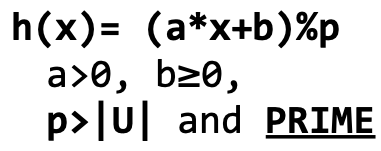

> U is the max_shingle_id


> The `create_hash_functions` function will take as input the number of hash function desired and the upper bound on the number of distinct elements. It will generate the three values `(a, b, p)` that defines an hash function `number_of_hash_functions` times and return all this information into a dictionary. The optional seed argument will be used to set the random seed, so that the hash function obtained can be controlled.

In [ ]:
def create_hash_functions(number_of_hash_functions, upper_bound_on_number_of_distinct_elements, seed=42):
    random.seed(seed)
    #
    map__hash_function_id__a_b_p = {}
    #
    set_of_all_hash_functions = set()
    while len(set_of_all_hash_functions) < number_of_hash_functions:
        a = random.randint(1, upper_bound_on_number_of_distinct_elements - 1)
        b = random.randint(0, upper_bound_on_number_of_distinct_elements - 1)
        p = random.randint(upper_bound_on_number_of_distinct_elements, 10 * upper_bound_on_number_of_distinct_elements)
        while is_prime(p) == False:
            p = random.randint(upper_bound_on_number_of_distinct_elements,
                               10 * upper_bound_on_number_of_distinct_elements)
        #
        c_hash_function = (a, b, p)
        set_of_all_hash_functions.add(c_hash_function)
    #
    for c_hash_function_id, c_hash_function in enumerate(set_of_all_hash_functions):
        map__hash_function_id__a_b_p[c_hash_function_id] = c_hash_function
    #
    return map__hash_function_id__a_b_p

In [ ]:
create_hash_functions(3, 30)

{0: (24, 3, 149), 1: (17, 19, 43), 2: (21, 3, 101)}

In [ ]:
create_hash_functions(2, 20)

{0: (4, 0, 193), 1: (18, 2, 43)}

In [ ]:
create_hash_functions(2, 20)

{0: (4, 0, 193), 1: (18, 2, 43)}

In [ ]:
create_hash_functions(2, 20, 123)

{0: (2, 8, 47), 1: (2, 12, 157)}

#### Generate MinWise Hash

> The `create_c_set_MinWiseHashing_sketch` function will receive as input a set of shingles, a list of hash functions parameters and the total number of hash functions to use. For each hash function, it applies it to each shingle and keeps the minimum value. It gives as output the MinWiseHashing sketch as a list.

In [ ]:
def create_c_set_MinWiseHashing_sketch(c_set,
                                       map_as_list__index__a_b_p,
                                       total_number_of_hash_functions, use_numpy_version = True):
    if use_numpy_version:
      app = np.array(map_as_list__index__a_b_p)
      c_set_MinWiseHashing_sketch = list(np.min((app[:,:1]*np.array(list(c_set))[None,:]+app[:,1:2])%app[:,2:],axis=1))
    else:
      plus_inf = float("+inf")
      c_set_MinWiseHashing_sketch = [plus_inf] * total_number_of_hash_functions
      for c_element_id in c_set:
          for index, (a, b, p) in enumerate(map_as_list__index__a_b_p):
              c_hash_value = (a * c_element_id + b) % p
              if c_hash_value < c_set_MinWiseHashing_sketch[index]:
                  c_set_MinWiseHashing_sketch[index] = c_hash_value
    return c_set_MinWiseHashing_sketch

In [ ]:
set_of_shingle_ids = {1,2,3,4}
hash_functions_parameters_list = ((2,2,7), (1,2,11))
number_of_hash_functions = len(hash_functions_parameters_list)

In [ ]:
create_c_set_MinWiseHashing_sketch(set_of_shingle_ids, hash_functions_parameters_list, number_of_hash_functions)

[1, 3]

In [ ]:
#CHECKING IF WORKING AS INTENDED
for (a, b, p) in hash_functions_parameters_list:
  for shingle_id in set_of_shingle_ids:
    print((a * shingle_id + b) % p)
  print()

4
6
1
3

3
4
5
6



#### MinWiseHashing Pipeline

> The `create_MinWiseHashing_sketches` function first generates the list of hash functions. Then it iterates through the input file containing the set of shingles for each document, computing the MinWiseHashing sketch for each set of shingles and storing this information into a dictionary. This variable is then saved into an output file.

In [ ]:
def create_MinWiseHashing_sketches(input_file_name, upper_bound_on_number_of_distinct_elements,
                                   number_of_hash_functions_that_is_also_the_sketch_lenght_and_also_the_number_of_simulated_permutations,
                                   output_file_name, use_numpy_version=True):
    #
    map__hash_function_id__a_b_p = create_hash_functions(
        number_of_hash_functions_that_is_also_the_sketch_lenght_and_also_the_number_of_simulated_permutations,
        upper_bound_on_number_of_distinct_elements)
    #
    map__set_id__MinWiseHashing_sketch = {}
    #
    total_number_of_hash_functions = len(map__hash_function_id__a_b_p)
    # sorted_list_all_hash_function_id = sorted(map__hash_function_id__a_b_p.keys())
    map_as_list__index__a_b_p = tuple([(a, b, p) for a, b, p in map__hash_function_id__a_b_p.values()])
    #
    input_file = open(input_file_name, 'r', encoding="utf-8")
    input_file_csv_reader = csv.reader(input_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = next(input_file_csv_reader)
    num_record_so_far = 0
    for record in input_file_csv_reader:
      num_record_so_far += 1
      if num_record_so_far % 100 == 0:
          print(num_record_so_far)
      c_set_id = int(record[0])
      c_set = eval(record[1])

      c_set_MinWiseHashing_sketch = create_c_set_MinWiseHashing_sketch(c_set,map_as_list__index__a_b_p,
                                                                       total_number_of_hash_functions,
                                                                       use_numpy_version)
      
      #print(len(c_set_MinWiseHashing_sketch))
      map__set_id__MinWiseHashing_sketch[c_set_id] = c_set_MinWiseHashing_sketch
    input_file.close()
    #
    output_file = open(output_file_name, 'w', encoding="utf-8")
    output_file_csv_writer = csv.writer(output_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = ['set_id', 'MinWiseHashing_sketch']
    output_file_csv_writer.writerow(header)
    sorted_list_all_set_id = sorted(map__set_id__MinWiseHashing_sketch.keys())
    for c_set_id in sorted_list_all_set_id:
        output_file_csv_writer.writerow([c_set_id, str(map__set_id__MinWiseHashing_sketch[c_set_id])])
    output_file.close()
    #
    return

### Example

In [ ]:
input_file_name = "tweets__set_id__set_of_integers.tsv"
max_shingle_id = 561265
output_file_name = "tweets__set_id__MinWiseHashing_sketch.tsv"

number_of_hash_functions_that_is_also_the_sketch_length_and_also_the_number_of_simulated_permutations = 32

create_MinWiseHashing_sketches(input_file_name, max_shingle_id,
                               number_of_hash_functions_that_is_also_the_sketch_length_and_also_the_number_of_simulated_permutations,
                               output_file_name)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

## Locality-Sensitive Hashing

### Functions

#### Load MinWiseHashing sketches

> This function will simply load the MinWiseHashing sketches from the given input file.

In [ ]:
def load_map__set_id__MinWiseHashing_sketch_from_file(input_file_name):
    map__set_id__MinWiseHashing_sketch = {}
    #
    input_file = open(input_file_name, 'r', encoding="utf-8")
    input_file_csv_reader = csv.reader(input_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = next(input_file_csv_reader)
    for record in input_file_csv_reader:
        c_set_id = int(record[0])
        c_MinhiseHashing_sketch = tuple(eval(record[1]))
        #
        map__set_id__MinWiseHashing_sketch[c_set_id] = c_MinhiseHashing_sketch
        #
    input_file.close()
    #
    return map__set_id__MinWiseHashing_sketch

#### Get candidates to be near duplicates

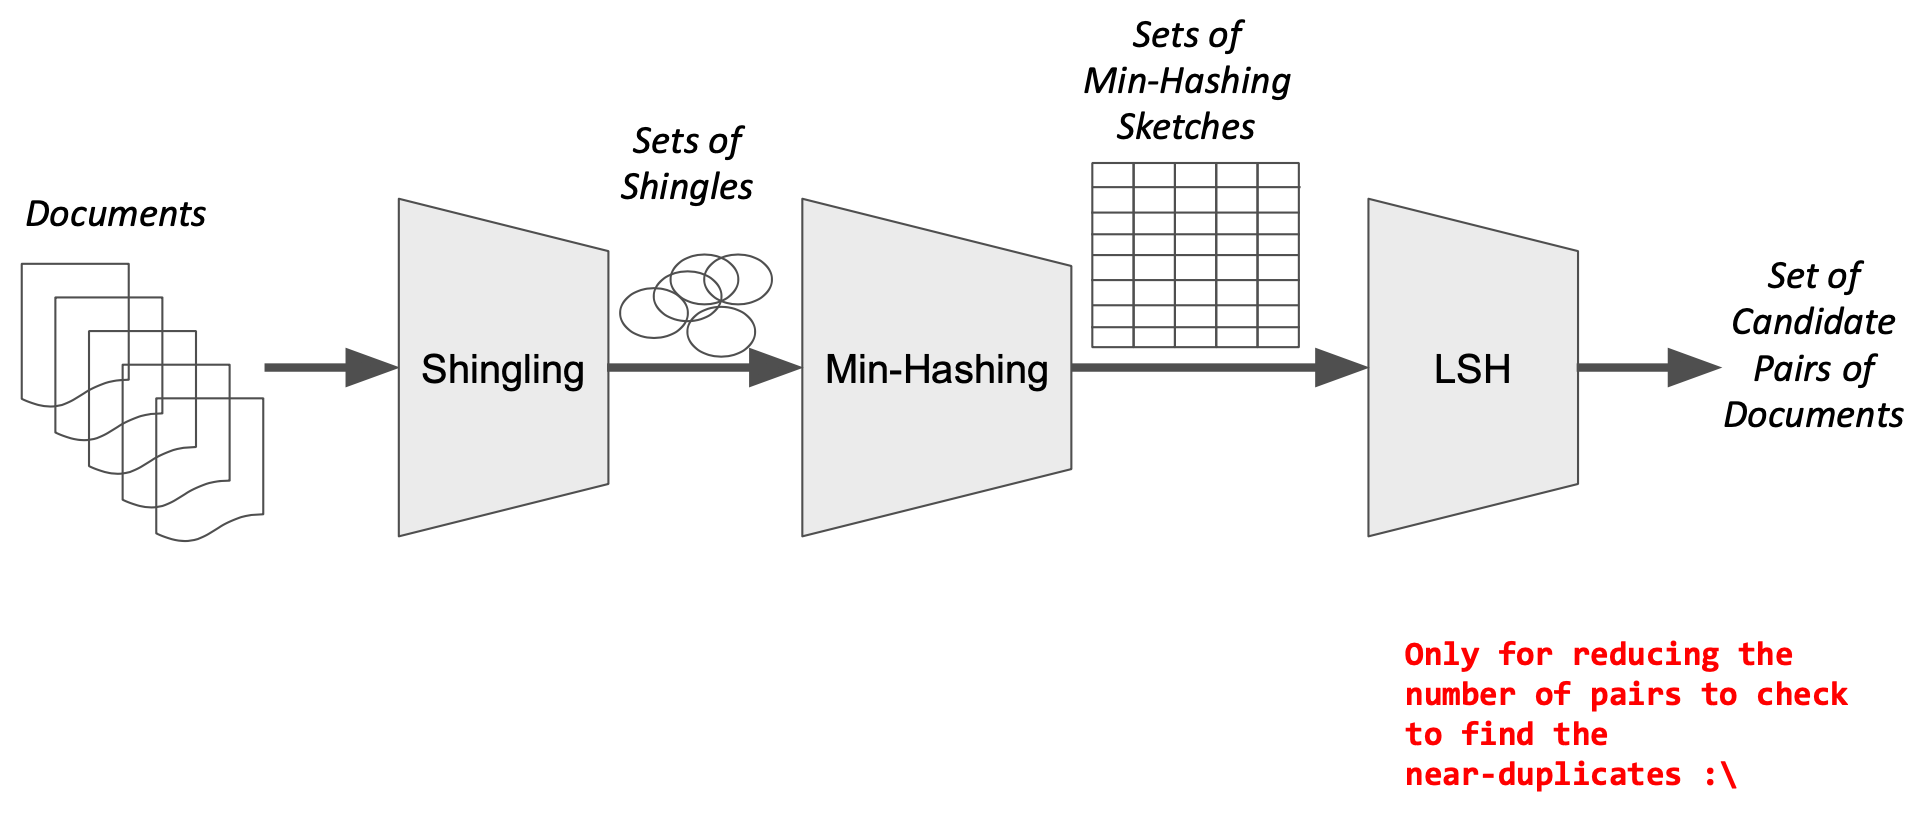

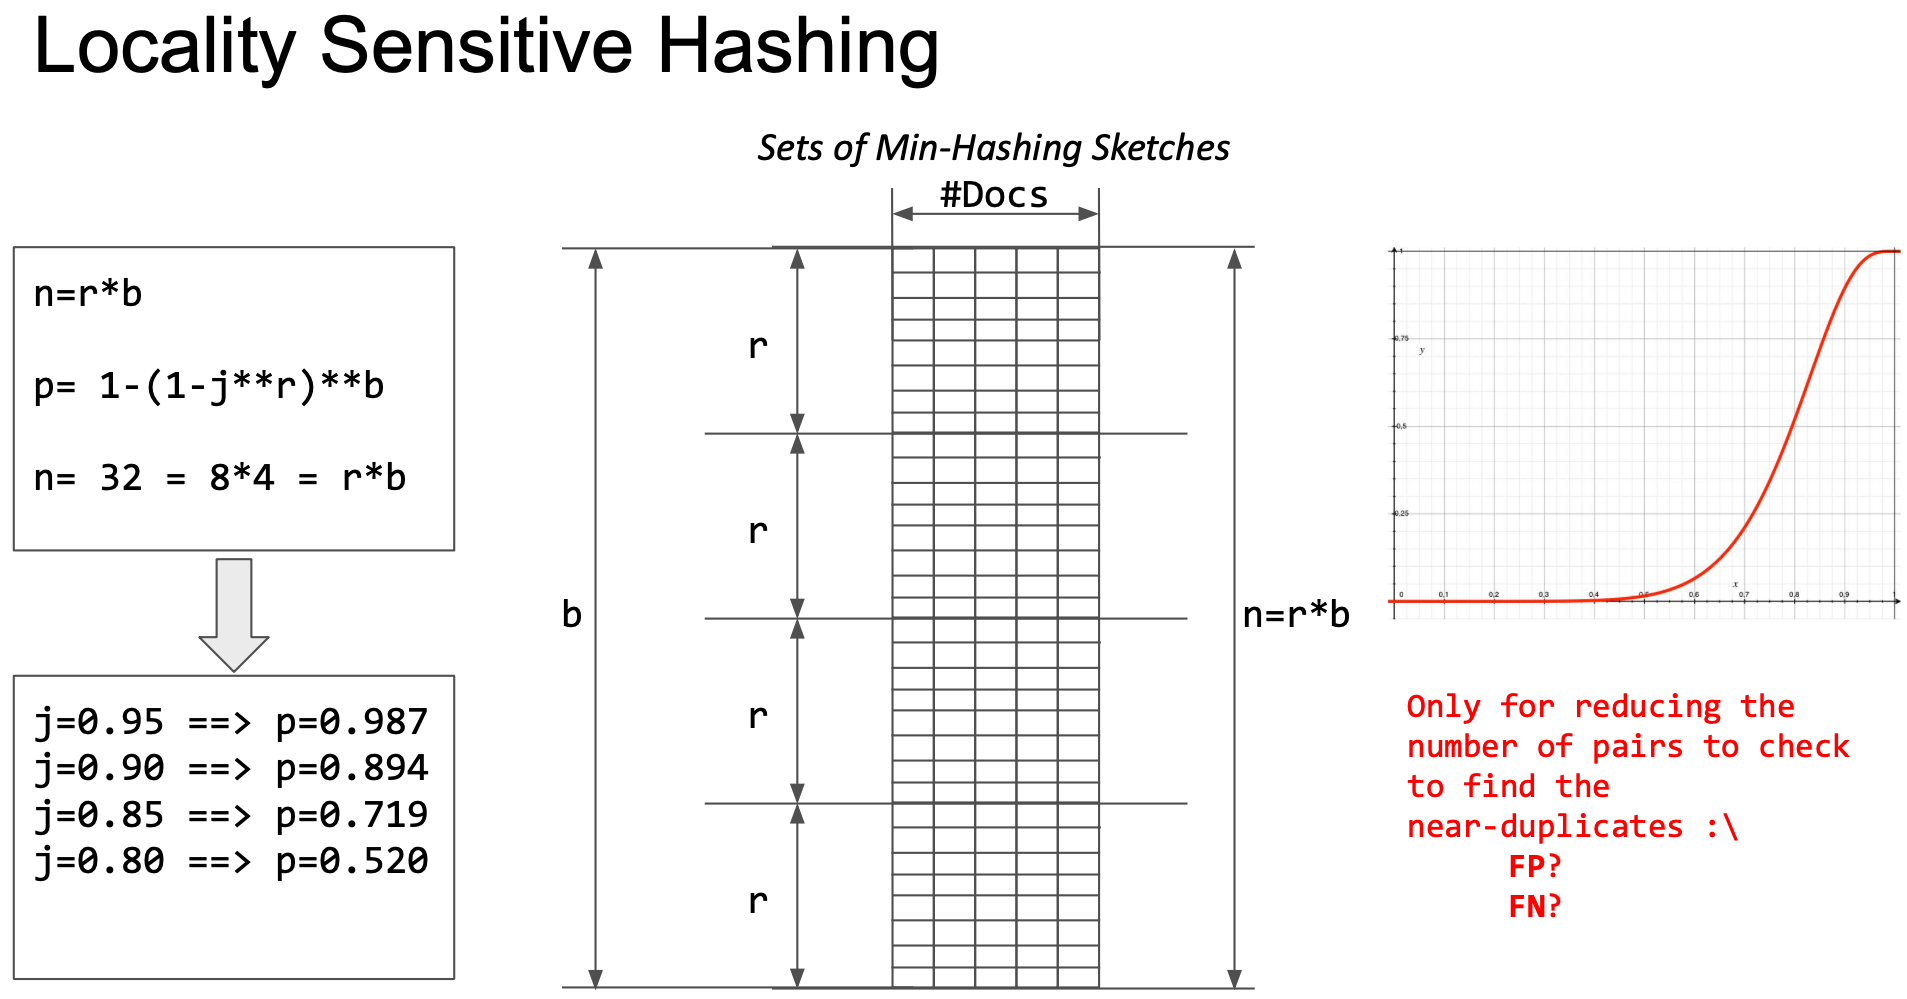

> **In the plot, the x-axis is the Jaccard similarity and the y-axis is the probability that a couple of sets with that Jaccard similarity will be selected as near-duplicates candidates**

> The function computes the sets of unordered couples of document identifiers for which there is at least one band in common between the MinWiseHashing sketches. It takes in input the number or rows and the number of bands and the MinWiseHashing sketches. The number of rows (r) multiplied by the number of bands (b) must be equal to the size of the sketches (n): r*b = n.

In [ ]:
def get_set_of_CANDIDATES_to_be_near_duplicates(r, b, map__set_id__MinWiseHashing_sketch):
    #
    set_of_CANDIDATES_to_be_near_duplicates = set()
    #
    for c_band_progressive_id in range(b):
        #
        print("c_band_progressive_id", c_band_progressive_id)
        #
        c_band_starting_index = c_band_progressive_id * r
        c_band_ending_index = (c_band_progressive_id + 1) * r
        #
        map__band__set_set_id = {}
        #
        for c_set_id in map__set_id__MinWiseHashing_sketch:
            #
            if r * b != len(map__set_id__MinWiseHashing_sketch[c_set_id]):
                n = len(map__set_id__MinWiseHashing_sketch[c_set_id])
                message = "ERROR!!! n != r*b " + str(n) + "!=" + str(r * b) + "; " + str(n) + "!=" + str(r) + "*" + str(
                    b)
                raise ValueError(message)
            #
            c_band_for_c_set = tuple(
                map__set_id__MinWiseHashing_sketch[c_set_id][c_band_starting_index:c_band_ending_index])
            #
            if c_band_for_c_set not in map__band__set_set_id:
                map__band__set_set_id[c_band_for_c_set] = set()
            map__band__set_set_id[c_band_for_c_set].add(c_set_id)
            #

        for c_set_set_id in map__band__set_set_id.values():
            #
            if len(c_set_set_id) > 1:
                #
                for set_id_a, set_id_A in it.combinations(c_set_set_id, 2):
                    if set_id_a < set_id_A:
                        set_of_CANDIDATES_to_be_near_duplicates.add((set_id_a, set_id_A))
                    else:
                        set_of_CANDIDATES_to_be_near_duplicates.add((set_id_A, set_id_a))
        #
    #
    return set_of_CANDIDATES_to_be_near_duplicates

In [ ]:
minWiseHash_sketches = {1:[2,3,4,5],2:[2,3,4,5],3:[2,3,8,9],4:[4,5,8,5]}

In [ ]:
get_set_of_CANDIDATES_to_be_near_duplicates(4,1,minWiseHash_sketches)

c_band_progressive_id 0


{(1, 2)}

In [ ]:
get_set_of_CANDIDATES_to_be_near_duplicates(2,2,minWiseHash_sketches)

c_band_progressive_id 0
c_band_progressive_id 1


{(1, 2), (1, 3), (2, 3)}

In [ ]:
get_set_of_CANDIDATES_to_be_near_duplicates(1,4,minWiseHash_sketches)

c_band_progressive_id 0
c_band_progressive_id 1
c_band_progressive_id 2
c_band_progressive_id 3


{(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)}

#### Approximate Jaccard

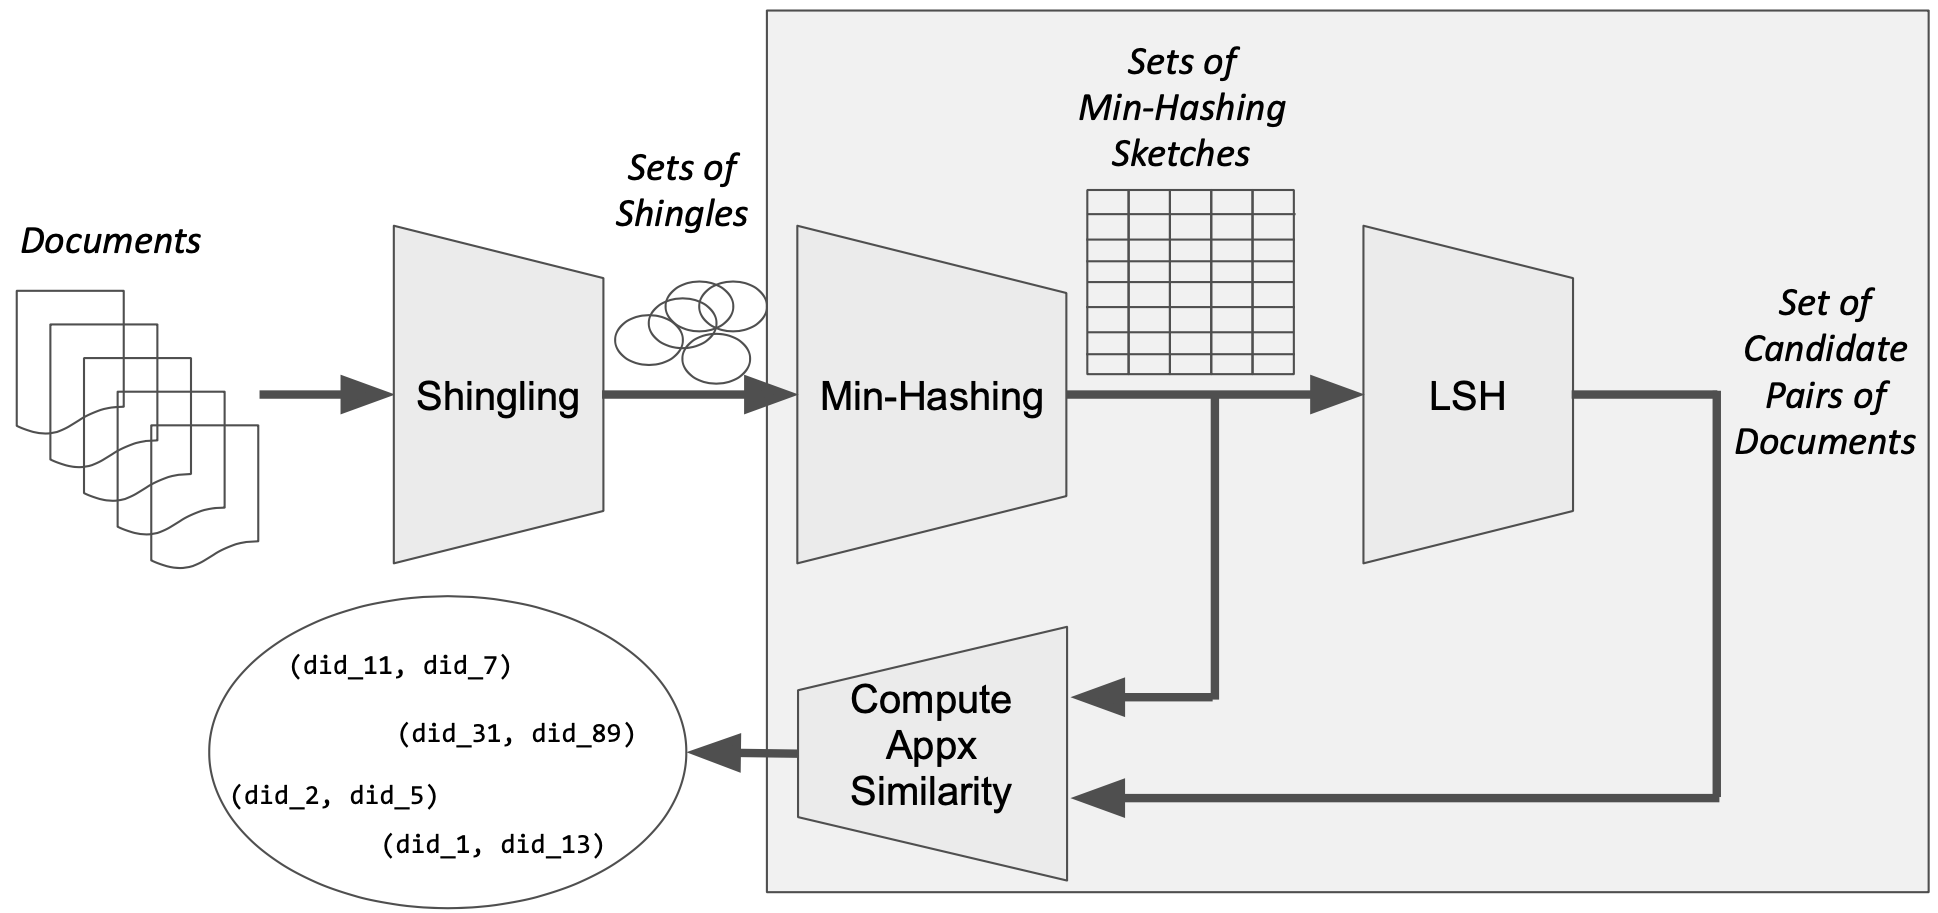

> Given two MinWiseHashing sketches, this function will iterate through each of them, counting how many items are equal. Then, it will output this count divided by the length of the sketches.

In [ ]:
def compute_approximate_jaccard(set_a_MinWiseHashing_sketch, set_b_MinWiseHashing_sketch):
    appx_jaccard = 0.
    #
    for index in range(len(set_a_MinWiseHashing_sketch)):
        #
        if set_a_MinWiseHashing_sketch[index] == set_b_MinWiseHashing_sketch[index]:
            appx_jaccard += 1
        #
    appx_jaccard /= len(set_a_MinWiseHashing_sketch)
    #
    return appx_jaccard

> Given a Jaccard Threshold, this function will iterate through the list of near duplicates CANDIDATES, computing for each of them the approximate jaccard. If this value overcomes the threshold, the candidate pair is added to a dictionary to be returned.

In [ ]:
def compute_approximate_jaccard_to_REDUCE_the_number_of_CANDIDATES_to_be_near_duplicates(
        set_of_CANDIDATES_to_be_near_duplicates,
        map__set_id__MinWiseHashing_sketch, jaccard_threshold):
    map__set_a_id__set_A_id__appx_jaccard = {}
    #
    for set_a_id, set_A_id in set_of_CANDIDATES_to_be_near_duplicates:
        #
        set_a_MinWiseHashing_sketch = map__set_id__MinWiseHashing_sketch[set_a_id]
        set_A_MinWiseHashing_sketch = map__set_id__MinWiseHashing_sketch[set_A_id]
        #
        appx_jaccard = compute_approximate_jaccard(set_a_MinWiseHashing_sketch, set_A_MinWiseHashing_sketch)
        #
        if appx_jaccard >= jaccard_threshold:
            map__set_a_id__set_A_id__appx_jaccard[(set_a_id, set_A_id)] = appx_jaccard
        #
    #
    return map__set_a_id__set_A_id__appx_jaccard

In [ ]:
compute_approximate_jaccard([2,3,4,5],[2,3,4,5])

1.0

In [ ]:
compute_approximate_jaccard([2,3,4,5],[2,3,8,9])

0.5

In [ ]:
compute_approximate_jaccard([2,3,8,9],[4,5,8,5])

0.25

In [ ]:
compute_approximate_jaccard_to_REDUCE_the_number_of_CANDIDATES_to_be_near_duplicates(
    {(1,2),(1,3),(3,4)},{1:[2,3,4,5],2:[2,3,4,5],3:[2,3,8,9],4:[4,5,8,5]},0
)

{(1, 2): 1.0, (1, 3): 0.5, (3, 4): 0.25}

In [ ]:
compute_approximate_jaccard_to_REDUCE_the_number_of_CANDIDATES_to_be_near_duplicates(
    {(1,2),(1,3),(3,4)},{1:[2,3,4,5],2:[2,3,4,5],3:[2,3,8,9],4:[4,5,8,5]},0.4
)

{(1, 2): 1.0, (1, 3): 0.5}

In [ ]:
compute_approximate_jaccard_to_REDUCE_the_number_of_CANDIDATES_to_be_near_duplicates(
    {(1,2),(1,3),(3,4)},{1:[2,3,4,5],2:[2,3,4,5],3:[2,3,8,9],4:[4,5,8,5]},0.75
)

{(1, 2): 1.0}

#### Near Duplicates Mining Pipeline

> This function simply calls all the four previous functions in order; loads the MinWiseHashing sketches, gets the CANDIDATES to be near-duplicates and computes the approximate Jaccard to REDUCE the number of CANDIDATES.

In [ ]:
def mine_couples_of_Near_Duplicates(input_file_name, r, b, jaccard_threshold):
    #
    print("Starting the loading of the MinWiseHashing sketches from the input file.")
    map__set_id__MinWiseHashing_sketch = load_map__set_id__MinWiseHashing_sketch_from_file(input_file_name)
    print()
    print("Number of sets=", len(map__set_id__MinWiseHashing_sketch))
    print()
    #
    print("Starting the mining of the CANDIDATES couples to be near duplicates.")
    set_of_CANDIDATES_to_be_near_duplicates = get_set_of_CANDIDATES_to_be_near_duplicates(r, b,
                                                                                          map__set_id__MinWiseHashing_sketch)
    #
    print()
    print("Number of pairs of sets to be near-duplicate CANDIDATES=", len(set_of_CANDIDATES_to_be_near_duplicates))
    print()
    #
    map__set_a_id__set_A_id__appx_jaccard = compute_approximate_jaccard_to_REDUCE_the_number_of_CANDIDATES_to_be_near_duplicates(
        set_of_CANDIDATES_to_be_near_duplicates, map__set_id__MinWiseHashing_sketch, jaccard_threshold)
    print()
    print("Number of REFINED pairs of sets to be near-duplicate CANDIDATES=",
          len(map__set_a_id__set_A_id__appx_jaccard))
    print()
    #
    output_file = open(output_file_name, 'w', encoding="utf-8")
    output_file_csv_writer = csv.writer(output_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = ['set_a_id', 'set_b_id', 'approximate_jaccard']
    output_file_csv_writer.writerow(header)
    sorted_list_all_set_id = sorted(map__set_id__MinWiseHashing_sketch.keys())
    for set_a_id__set_A_id in map__set_a_id__set_A_id__appx_jaccard:
        appx_jaccard = map__set_a_id__set_A_id__appx_jaccard[set_a_id__set_A_id]
        output_file_csv_writer.writerow([set_a_id__set_A_id[0], set_a_id__set_A_id[1], appx_jaccard])
    output_file.close()
    return

### Example

In [ ]:
r = 8
b = 4
jaccard_threshold = 0.95

input_file_name = "tweets__set_id__MinWiseHashing_sketch.tsv"
output_file_name = "tweets__NearDuplicates__set_a_id__set_b_id__approximate_jaccard__r_" + str(
    r) + "__b_" + str(b) + "__JaccThr_" + str(jaccard_threshold) + ".tsv"

mine_couples_of_Near_Duplicates(input_file_name, r, b, jaccard_threshold)

Starting the loading of the MinWiseHashing sketches from the input file.

Number of sets= 86459

Starting the mining of the CANDIDATES couples to be near duplicates.
c_band_progressive_id 0
c_band_progressive_id 1
c_band_progressive_id 2
c_band_progressive_id 3

Number of pairs of sets to be near-duplicate CANDIDATES= 10305


Number of REFINED pairs of sets to be near-duplicate CANDIDATES= 5803



> Let's have a look at the final result:

In [ ]:
#Load all the tweets:
map__tweet_id__tweet_content = {}

input_file_name = "tweets.txt"
input_file = open(input_file_name, 'r', encoding="utf-8")
input_file_csv_reader = csv.reader(input_file, delimiter=input_file_delimiter, quotechar=input_file_quotechar)
next(input_file_csv_reader)
for record in input_file_csv_reader:
    #
    doc_id = int(record[0])
    document = record[1]
    #
    map__tweet_id__tweet_content[doc_id] = document
input_file.close()

In [ ]:
output_file = open(output_file_name, 'r', encoding="utf-8")
output_file_csv_reader = csv.reader(output_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
header = next(output_file_csv_reader)
cont=0
for i,record in enumerate(output_file_csv_reader):
    print(record)
    print()
    cont+=1
    if cont%10==0:
      break
output_file.close()

['16001', '38269', '1.0']

['16311', '26417', '1.0']

['12322', '39399', '1.0']

['50283', '75080', '1.0']

['16517', '27488', '1.0']

['59303', '72107', '1.0']

['6660', '27722', '1.0']

['16001', '28591', '1.0']

['4262', '27488', '1.0']

['8654', '79958', '1.0']



In [ ]:
print(map__tweet_id__tweet_content[51570])
print(map__tweet_id__tweet_content[59055])

RT @HouseAppropsGOP: This morning, the Labor, HHS Subcommittee holds a hearing on the state of Down Syndrome research. Watch live --&gt; httpsâ€¦
RT @HouseAppropsGOP: This morning, the Labor, HHS Subcommittee holds a hearing on the state of Down Syndrome research. Watch live --&gt; httpsâ€¦


In [ ]:
print(map__tweet_id__tweet_content[73036])
print(map__tweet_id__tweet_content[73037])

Protecting our children is one of the most important things that we can do for society. Unfortunately, some courtsâ€¦ https://t.co/6DiDaL4y0w
Protecting our children is one of the most important things that we can do for society. Unfortunately, some courtsâ€¦ https://t.co/mNe1qp6cMC


## YOUR TURN
Try to play around with the various functions that compose the complete pipeline. Make sure you grasp all the concepts covered in this notebook.